<a href="https://colab.research.google.com/github/leelaakula/padhai-dl/blob/master/MorePythonBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive File Integration

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


    100% |████████████████████████████████| 993kB 20.1MB/s 
Uploaded file with ID 1pmyLVm3sapdV1vSVlMDk9YG2IL68Z-m3


In [2]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'file2Test.txt'})
uploaded.SetContentString('Hello World')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1BZZQ6Pvudg-BnNSVuLgJdwybCkxdKQ-m


In [3]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned.csv, id 1w9RC8ttUUxn3xOc4mOAu1UL_e0fkT5rZ


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1w9RC8ttUUxn3xOc4mOAu1UL_e0fkT5rZ'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [7]:
!ls

adc.json  mobile_cleaned_local.csv  sample_data


In [0]:
import pandas as pd

In [11]:
df = pd.read_csv('mobile_cleaned_local.csv')
# print(df)
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [12]:
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,...,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,...,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,...,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,...,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,...,5,16,6,74.7,0.0,10,12,3000,2,0


In [15]:
len(df)

109

In [16]:
df.shape

(109, 40)

In [17]:
df.loc[108]

sim_type                                 2.0
aperture                                 8.0
gpu_rank                                 3.0
weight                                 158.0
stand_by_time                          400.0
processor_frequency                      2.2
thickness                                7.4
flash_type                               6.0
front_camera_resolution                  8.0
auto_focus                               3.0
screen_size                              5.5
frames_per_second                       30.0
FM                                       1.0
no_of_reviews_in_gsmarena_in_week        0.0
os                                       0.0
phone_height                           152.7
screen_protection                        7.0
sim_size                                 8.0
price                                27999.0
talk_time                               40.0
video_resolution                      2160.0
display_resolution                       9.0
removable_

In [19]:
df_short = df[0:10]
df_short.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [30]:
df_thin = df[['sim_type', 'gpu_rank', 'thickness', 'price','is_liked']]
df_thin.shape

(109, 5)

In [31]:
df_thin.head()

,sim_type,gpu_rank,thickness,price,is_liked
0,0,55,10.5,3870,1
1,0,55,10.6,4059,1
2,0,55,8.5,4777,0
3,0,55,8.0,5799,1
4,1,55,7.9,5990,0


In [32]:
df_liked = df_thin[df_thin['is_liked']==1]
df_liked.head()

,sim_type,gpu_rank,thickness,price,is_liked
0,0,55,10.5,3870,1
1,0,55,10.6,4059,1
3,0,55,8.0,5799,1
6,1,56,8.8,5999,1
7,0,41,8.1,6599,1


In [33]:
df_liked.shape

(92, 5)

In [34]:
df_thin['price'].mean()

19373.211009174312

In [35]:
df_thin['price'].min()

3870

In [36]:
df_thin['price'].max()

64500

In [37]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [38]:
df_thin.describe()

,sim_type,gpu_rank,thickness,price,is_liked
count,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.981651,29.990826,8.330275,19373.211009,0.844037
std,1.347025,15.300385,1.173828,14039.197220,0.364496
min,0.000000,3.000000,5.100000,3870.000000,0.000000
25%,0.000000,16.000000,7.600000,8999.000000,1.000000
50%,0.000000,29.000000,8.100000,14614.000000,1.000000
75%,3.000000,41.000000,8.900000,24999.000000,1.000000
max,4.000000,56.000000,11.600000,64500.000000,1.000000


In [39]:
df_thin[df_thin['is_liked']==1]['price'].mean()

19393.239130434784

In [43]:
df_thin[df_thin['is_liked']==0]['price'].describe()

count       17.000000
mean     19264.823529
std      11172.690423
min       4777.000000
25%       7999.000000
50%      21999.000000
75%      25500.000000
max      37766.000000
Name: price, dtype: float64

In [0]:
g = df_thin.groupby(['is_liked'])

In [49]:
for key, df_key in g:
  print(key)
  print(df_key)

0
     sim_type  gpu_rank  thickness  price  is_liked
2           0        55        8.5   4777         0
4           1        55        7.9   5990         0
5           0        55        7.9   5999         0
11          0        55        7.9   6990         0
22          2        38        7.6   7999         0
38          2        27        8.8   9999         0
53          0        43        7.3  14300         0
60          2        16        8.9  15689         0
74          3        16        8.1  21999         0
77          1        24        8.5  22999         0
78          0        14        9.3  24499         0
80          1         3        7.3  24999         0
83          1        28        7.6  25500         0
90          3         9        9.2  34999         0
91          3         6        7.6  34999         0
95          3        28        9.6  37766         0
108         2         3        7.4  27999         0
1
     sim_type  gpu_rank  thickness  price  is_liked
0       

In [50]:
df_thin.groupby(['is_liked']).mean()

,sim_type,gpu_rank,thickness,price
is_liked,,,,
0,1.411765,27.941176,8.200000,19264.823529
1,0.902174,30.369565,8.354348,19393.239130


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

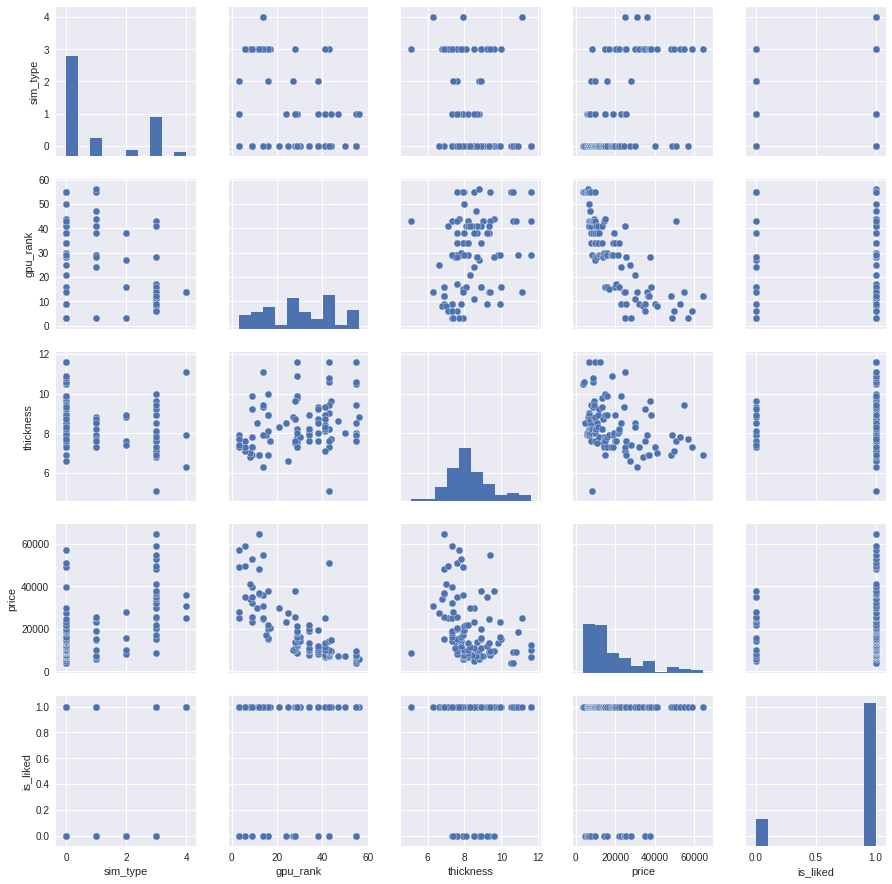

In [52]:
ax = sns.pairplot(df_thin, diag_kind='hist')

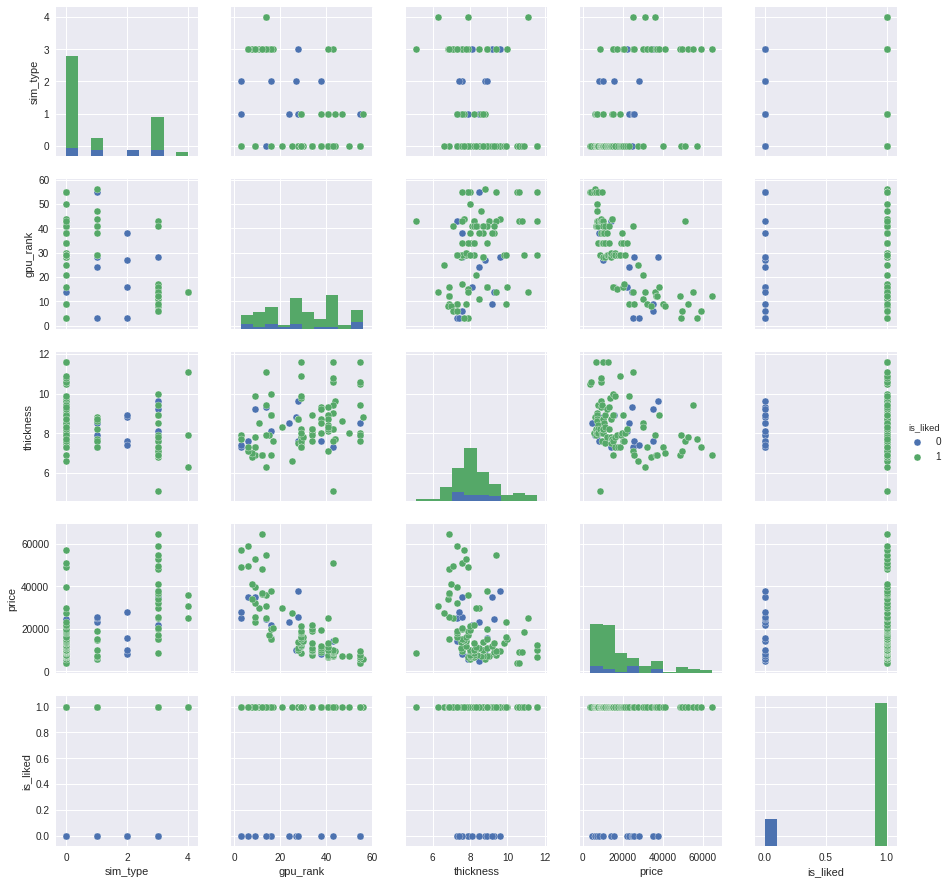

In [53]:
ax = sns.pairplot(df_thin, diag_kind='hist', hue='is_liked')

# Debugging

In [0]:
import random

In [0]:
def factorial(x):
  if(x==0):
    return 1
  return x * factorial(x-1)

In [56]:
factorial(5)

120

In [0]:
def code_debug():
  import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial(x)

In [66]:
code_debug()

> <ipython-input-63-72ab5bba0960>(3)code_debug()
-> for i in range(10):
(Pdb) help c
c(ont(inue))
        Continue execution, only stop when a breakpoint is encountered.
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) n
> <ipython-input-63-72ab5bba0960>(4)code_debug()
-> x = random.random()
(Pdb) n
> <ipython-input-63-72ab5bba0960>(5)code_debug()
-> factorial(x)
(Pdb) help l
l(ist) [first [,last] | .]

        List source co

BdbQuit: ignored

In [0]:
def factorial_debugged(x):
  if (not isinstance(x,int)):
    print('Only Supports Integers')
    return -1
  if(x==0):
    return 1
  return x * factorial(x-1)

In [0]:
def code_debug():
  import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial_debugged(x)

In [74]:
code_debug()

> <ipython-input-73-c6a3d188b938>(3)code_debug()
-> for i in range(10):
(Pdb) c
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers


In [75]:
%xmode Verbose

Exception reporting mode: Verbose


In [0]:
def code_debug():
  #import pdb; pdb.set_trace()
  
  for i in range(10):
    x = random.random()
    factorial(x)

In [77]:
code_debug()

RecursionError: ignored

In [0]:
def factorial_debugged(x):
  if (not isinstance(x,int)):
    print('Only Supports Integers')
    return -1
  else:
    return x * factorial(x-1) # implement remove bug
  if(x==0):
    return 1
  # return x * factorial(x-1)

In [0]:
def code_debug():  
  for i in range(10):
    x = random.random()
    factorial_debugged(x)

In [81]:
code_debug()

Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
Only Supports Integers
